In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import pytz
import numpy as np
from matplotlib.patches import Rectangle
from IPython.display import display

group0 = [14,16,18,13]

bookings = pd.read_json("../../chatbot_data/bookings/bookings14-9-23.json")

bookings = pd.DataFrame(bookings.fields.values.tolist())

# switch to a faster method of parsing datetime strings by inferring the format
bookings['start'] = pd.to_datetime(bookings['start'],infer_datetime_format=True).dt.floor('S')
bookings['created_at'] = pd.to_datetime(bookings['created_at'],infer_datetime_format=True).dt.floor('S')
bookings['modified_at'] = pd.to_datetime(bookings['modified_at'],infer_datetime_format=True).dt.floor('S')

coordinationStartDate = datetime.datetime(2023,8,21,0,0,0,0,tzinfo=pytz.timezone('UTC'))
validBookings = bookings.loc[bookings['start']>= coordinationStartDate] 

pilotBookings = validBookings.loc[validBookings['user'].isin(group0)].copy() 
pilotBookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
2,2023-08-24 19:00:00+00:00,5400,washing_and_drying,None,yes,0.539100,13,electricity_consumption,14,2023-08-22 20:50:20+00:00,2023-08-22 20:50:20+00:00
3,2023-08-23 18:00:00+00:00,10800,washing_and_drying,None,yes,1.324720,12,electricity_consumption,13,2023-08-23 16:33:59+00:00,2023-08-23 08:32:34+00:00
4,2023-08-25 09:00:00+00:00,3600,washing_and_drying,None,yes,0.730841,15,electricity_consumption,16,2023-08-24 16:32:35+00:00,2023-08-24 16:32:35+00:00
5,2023-08-27 17:00:00+00:00,3600,dishwasher,None,yes,1.229527,15,electricity_consumption,16,2023-08-24 16:38:47+00:00,2023-08-24 16:38:47+00:00
7,2023-08-26 09:00:00+00:00,1800,washing_and_drying,None,yes,0.235443,17,electricity_consumption,18,2023-08-25 19:03:58+00:00,2023-08-25 19:03:58+00:00
11,2023-08-26 12:00:00+00:00,7200,dishwasher,None,yes,2.459053,15,electricity_consumption,16,2023-08-26 11:44:59+00:00,2023-08-26 11:44:59+00:00
20,2023-08-30 12:00:00+00:00,1800,dishwasher,None,yes,0.614763,15,electricity_consumption,16,2023-08-29 15:24:55+00:00,2023-08-29 15:24:55+00:00
21,2023-08-29 16:00:00+00:00,10800,washing_and_drying,None,yes,1.324720,12,electricity_consumption,13,2023-08-29 15:45:42+00:00,2023-08-29 15:45:42+00:00
22,2023-08-29 16:00:00+00:00,1800,hob,None,yes,0.197686,12,electricity_consumption,13,2023-08-29 15:48:23+00:00,2023-08-29 15:48:23+00:00
24,2023-08-30 16:00:00+00:00,10800,washing_and_drying,None,yes,1.324720,12,electricity_consumption,13,2023-08-30 09:29:35+00:00,2023-08-30 09:23:30+00:00


32 bookings were made in total.


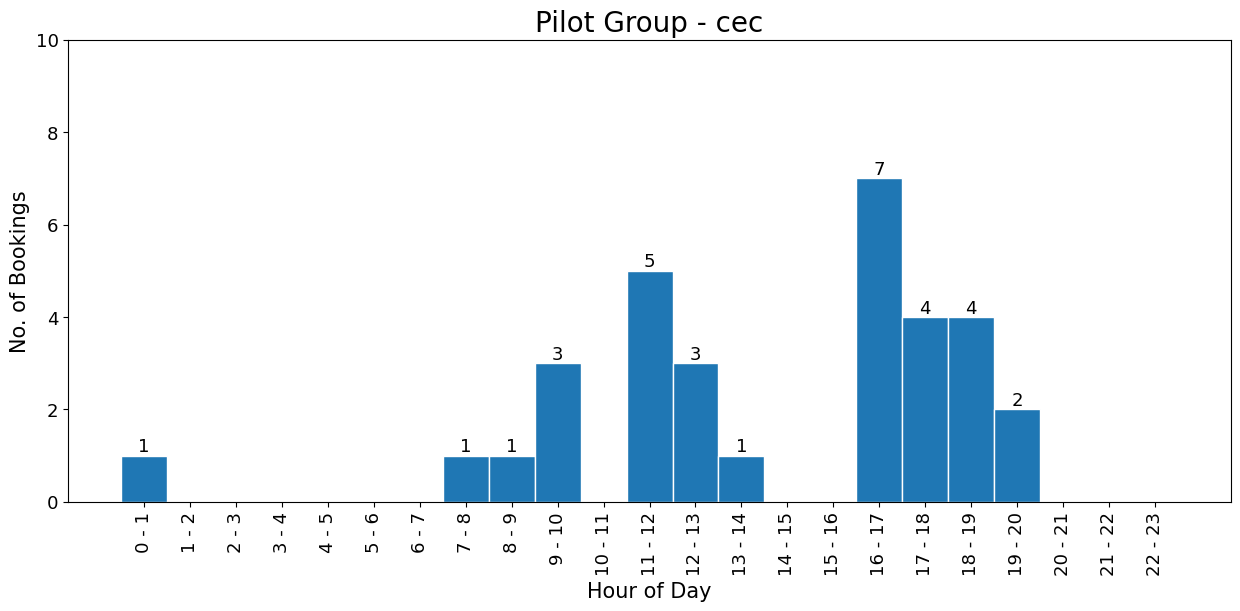

In [2]:
# Extract the hour from 'created_at'
pilotBookings['hour'] = pilotBookings['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(pilotBookings['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(15, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Pilot Group - cec", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(pilotBookings)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 2, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('cec_pilot_group_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

2 bookings were made in total.


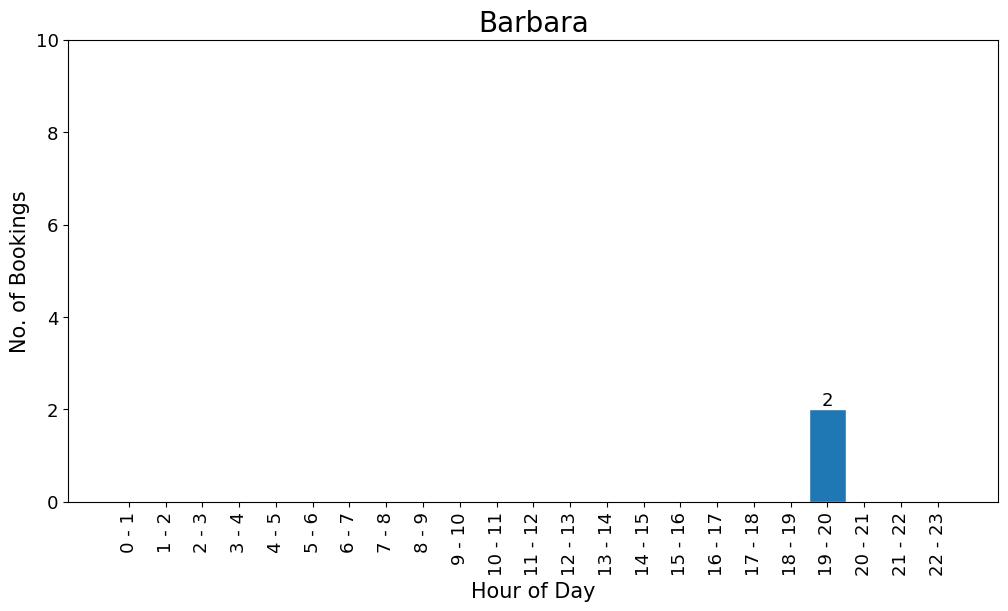

In [3]:
# User 14

bookingsUser14 = bookings.loc[bookings['user'] == 14].copy()

# Extract the hour from 'created_at'
bookingsUser14['hour'] = bookingsUser14['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser14['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Barbara", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser14)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('barbara_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

18 bookings were made in total.


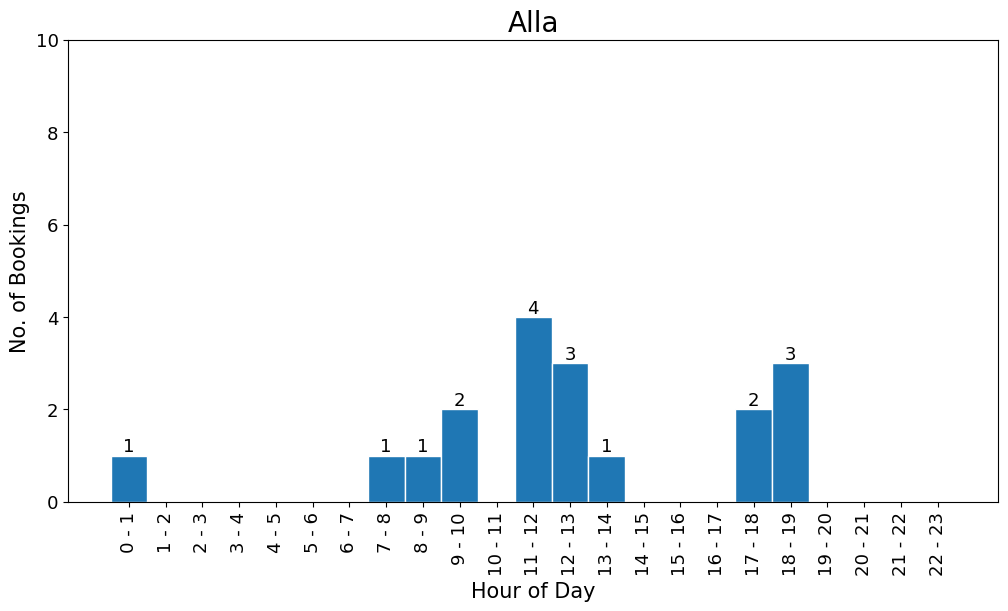

In [4]:
# User 16

bookingsUser16 = bookings.loc[bookings['user'] == 16].copy()

# Extract the hour from 'created_at'
bookingsUser16['hour'] = bookingsUser16['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser16['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Alla", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser16)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('alla_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

2 bookings were made in total.


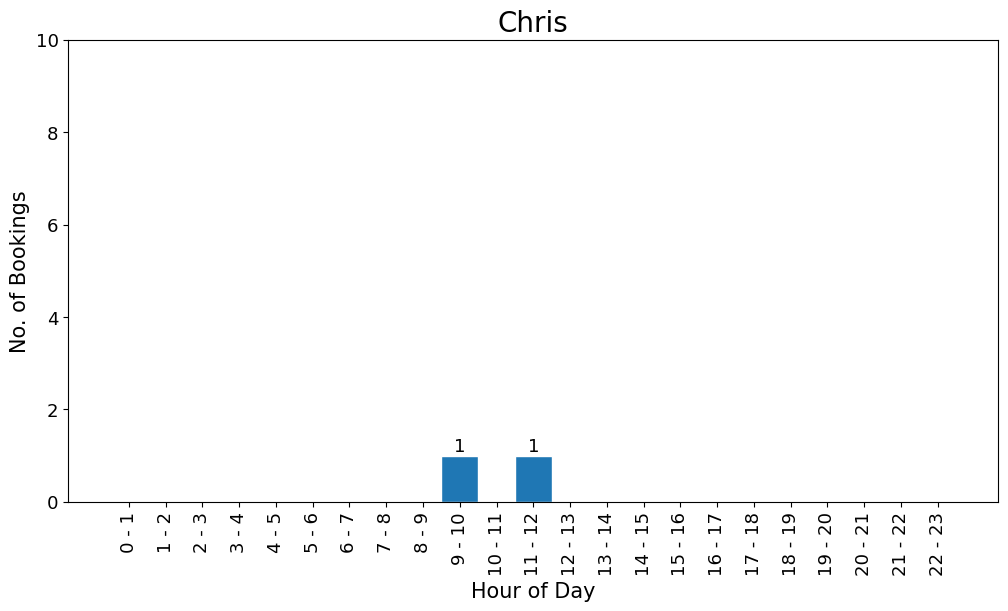

In [5]:
# User 18

bookingsUser18 = bookings.loc[bookings['user'] == 18].copy()

# Extract the hour from 'created_at'
bookingsUser18['hour'] = bookingsUser18['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser18['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Chris", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser18)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('chris_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

10 bookings were made in total.


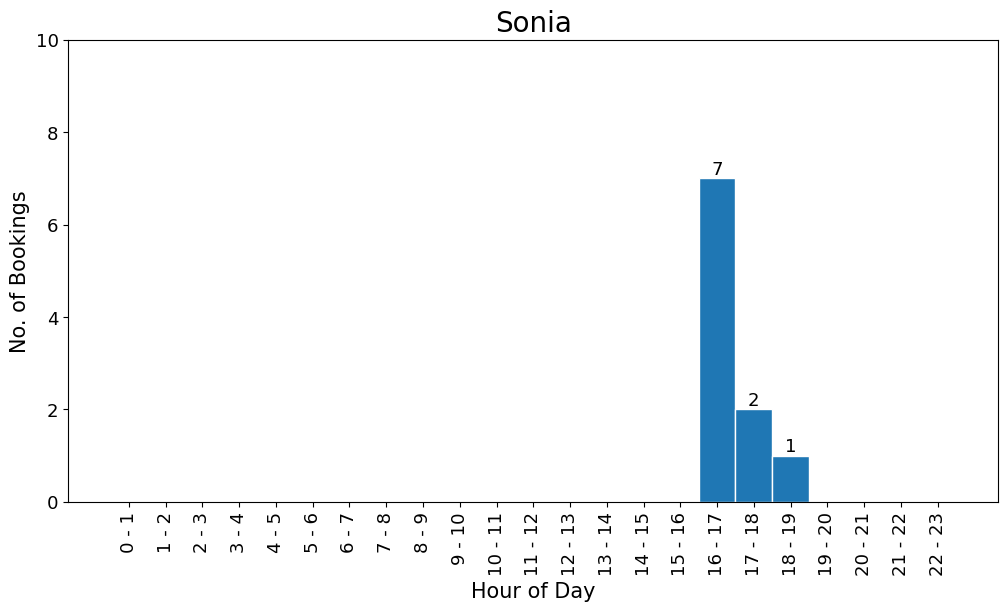

In [6]:
# User 13

bookingsUser13 = bookings.loc[bookings['user'] == 13].copy()

# Extract the hour from 'created_at'
bookingsUser13['hour'] = bookingsUser13['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser13['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Sonia", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser13)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('sonia_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()